<a href="https://colab.research.google.com/github/ShivarajPatilaa/Time-series/blob/main/shivaraj_Patil_20_10_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fittlyf Data Science test**

|Questions| completed(yes/no)|
|---------|------------------|
|     1   |        yes       |
|     2.a | yes  |
|     2.b | yes |
|     2.c | yes |
|     3.a | yes |
|     3.b | No |

In [191]:
# Importing Dependencies for Data Analysis, Visualization, and Interactive Widgets

# Import NumPy for numerical operations
import numpy as np

# Import pandas for data manipulation and analysis
import pandas as pd

# Import Matplotlib's Pyplot module for creating static plots and charts
import matplotlib.pyplot as plt

# Import Seaborn for enhanced data visualization capabilities
import seaborn as sns

# Enable inline plotting for Jupyter Notebook or Jupyter Lab
%matplotlib inline

# Import the 'interact' function from the 'ipywidgets' library for creating interactive widgets
from ipywidgets import interact


In [192]:
# Loading the Dataset from an Excel File

# Read the data from an Excel file using pandas and specify the sheet name 'Funnel'
df_funnel = pd.read_excel('/content/Intern Hiring Assignment Data.xlsx', sheet_name='Funnel')

# Convert the loaded DataFrame to a CSV file and save it
df_funnel.to_csv('funnel.csv')


In [193]:
# Reading the CSV File and Displaying Data

# Read the data from the CSV file 'funnel.csv' using pandas
funnel_df = pd.read_csv('funnel.csv')

# Display the first few rows of the dataset using 'head()'
print(funnel_df.head())

# Display the last few rows of the dataset using 'tail()'
funnel_df.tail()


   Unnamed: 0  Year  Month Customer Segment Region           KPI Value Type  \
0           0  2020     12          Clients  India  Lv1_Visitors    Actuals   
1           1  2020     12          Clients  India  Lv2_Visitors    Actuals   
2           2  2020     12          Clients  India  Lv3_Visitors    Actuals   
3           3  2020     12          Clients  India  Lv4_Visitors    Actuals   
4           4  2020     12          Clients  India  Lv3_Visitors    Actuals   

       Value  
0  2365913.0  
1  2689569.0  
2  1300571.0  
3        NaN  
4   706677.0  


,Unnamed: 0,Year,Month,Customer Segment,Region,KPI,Value Type,Value
1567,1567,2022,1,Customers,Dehradun,Lv5_Visitors,Actuals,1693.0
1568,1568,2022,1,Customers,Aurangabad,Lv4_Visitors,Actuals,1428.0
1569,1569,2022,1,Customers,Ujjain,Lv5_Visitors,Actuals,1311.0
1570,1570,2022,1,Customers,Faridabad,Lv5_Visitors,Actuals,1071.0
1571,1571,2022,1,Customers,Aurangabad,Lv5_Visitors,Actuals,527.0


In [194]:
funnel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1572 non-null   int64  
 1   Year              1572 non-null   int64  
 2   Month             1572 non-null   int64  
 3   Customer Segment  1572 non-null   object 
 4   Region            1572 non-null   object 
 5   KPI               1572 non-null   object 
 6   Value Type        1572 non-null   object 
 7   Value             1547 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 98.4+ KB


In [195]:
funnel_df.drop('Unnamed: 0', axis=1, inplace=True) #drop the column "Unnamed"

**Observation** :
-  The column named 'Unnamed:0' is not required for further calculation or analysis .
-  Column 'Value' contains null vlaues


In [196]:
funnel_df.describe(include='all') #Statistical decsription of dataset

,Year,Month,Customer Segment,Region,KPI,Value Type,Value
count,1572.000000,1572.000000,1572,1572,1572,1572,1.547000e+03
unique,NaN,NaN,2,7,5,1,NaN
top,NaN,NaN,Customers,India,Lv3_Visitors,Actuals,NaN
freq,NaN,NaN,1080,432,324,1572,NaN
mean,2021.129771,6.500000,NaN,NaN,NaN,NaN,2.692382e+05
std,0.832781,3.453151,NaN,NaN,NaN,NaN,6.460538e+05
min,2020.000000,1.000000,NaN,NaN,NaN,NaN,1.370000e+02
25%,2020.000000,3.750000,NaN,NaN,NaN,NaN,9.292000e+03
50%,2021.000000,6.500000,NaN,NaN,NaN,NaN,3.256400e+04
75%,2022.000000,9.250000,NaN,NaN,NaN,NaN,1.726195e+05


In [197]:
cat_columns= funnel_df.select_dtypes(include=['object']).columns
cat_columns

Index(['Customer Segment', 'Region', 'KPI', 'Value Type'], dtype='object')

In [198]:
# The @interact decorator is used to create an interactive widget for selecting a column.
# Users can choose a categorical column from the 'cat_columns' list.

@interact
def countvalues(col = list(cat_columns)):
  print(funnel_df[col].value_counts())

interactive(children=(Dropdown(description='col', options=('Customer Segment', 'Region', 'KPI', 'Value Type'),…

**Observation** :
-  Column 'Value Type' contain only value named "Actuals", it doesn't provide any valuable information for your analysis, you can simply drop it from your DataFrame.
-  Else, If you want to keep the "Value Type" column for documentation or future reference, you can leave it in your DataFrame. It won't affect your analysis as long as it contains the same value ("Actuals") for all rows.

Keeping the column might be useful if you want to maintain the original structure of your data for documentation purposes or if you anticipate that the content of the column might change in the future.

In [199]:
nu_columns= funnel_df[['Year', 'Month']].columns
nu_columns

Index(['Year', 'Month'], dtype='object')

In [200]:
@interact
def countvalues(col = list(nu_columns)):
  print(funnel_df[col].value_counts())

interactive(children=(Dropdown(description='col', options=('Year', 'Month'), value='Year'), Output()), _dom_cl…

In [201]:
funnel_df.isnull().sum() # checking null values

Year                 0
Month                0
Customer Segment     0
Region               0
KPI                  0
Value Type           0
Value               25
dtype: int64

In [202]:
# Filtering and Displaying Rows with Null Values

# Create a new DataFrame 'null_df' by filtering the original DataFrame 'funnel_df'.
# Select rows where the 'Value' column is null (contains missing values).

null_df = funnel_df[funnel_df['Value'].isnull()].sort_values(by= ['Customer Segment', 'Region'])
null_df # Null values in data set

,Year,Month,Customer Segment,Region,KPI,Value Type,Value
3,2020,12,Clients,India,Lv4_Visitors,Actuals,NaN
132,2021,9,Clients,India,Lv2_Visitors,Actuals,NaN
133,2021,9,Clients,India,Lv3_Visitors,Actuals,NaN
166,2020,8,Clients,India,Lv3_Visitors,Actuals,NaN
175,2021,8,Clients,India,Lv4_Visitors,Actuals,NaN
257,2021,6,Clients,India,Lv3_Visitors,Actuals,NaN
331,2020,4,Clients,India,Lv4_Visitors,Actuals,NaN
381,2021,3,Clients,India,Lv3_Visitors,Actuals,NaN
454,2020,1,Clients,India,Lv3_Visitors,Actuals,NaN
463,2021,1,Clients,India,Lv3_Visitors,Actuals,NaN


In [203]:
#Function to calculate mean value based on KPI , region and customer segment.
def mean_values(cus_seg, region, kpi):
  mean_val=funnel_df[(funnel_df['Customer Segment']== cus_seg) & (funnel_df['Region']==region) & (funnel_df['KPI'] == kpi)]['Value'].mean()
  return mean_val

In [204]:
mean_val=mean_values('Clients', 'India', 'Lv4_Visitors')
mean_val

513433.8596491228

In [205]:
funnel_df1= funnel_df.copy()
funnel_df1.head()

,Year,Month,Customer Segment,Region,KPI,Value Type,Value
0,2020,12,Clients,India,Lv1_Visitors,Actuals,2365913.0
1,2020,12,Clients,India,Lv2_Visitors,Actuals,2689569.0
2,2020,12,Clients,India,Lv3_Visitors,Actuals,1300571.0
3,2020,12,Clients,India,Lv4_Visitors,Actuals,NaN
4,2020,12,Clients,India,Lv3_Visitors,Actuals,706677.0


In [206]:
funnel_df1.isnull().sum()

Year                 0
Month                0
Customer Segment     0
Region               0
KPI                  0
Value Type           0
Value               25
dtype: int64

In [207]:
# Function to Replace Null Values with Calculated Mean

def fillna_with_mean(x):
    # Define a condition to filter the dataset based on 'Customer Segment,' 'Region,' and 'KPI.'
    condition = (funnel_df1['Customer Segment'] == x['Customer Segment']) & (funnel_df1['Region'] == x['Region']) & (funnel_df1['KPI'] == x['KPI'])

    # Calculate the mean value of 'Value' for rows that meet the specified condition.
    mean_value = funnel_df1[condition]['Value'].mean()

    # Return the calculated mean value.
    return mean_value

# Use the apply() function to fill null values in the 'Value' column.
# For each row in the DataFrame, apply the 'fillna_with_mean' function if 'Value' is null,
# and replace the null value with the calculated mean value.
funnel_df1['Value'].fillna(funnel_df1[funnel_df1['Value'].isna()].apply(fillna_with_mean, axis=1), inplace=True)


In [208]:
funnel_df1.isnull().sum() #checking null values

Year                0
Month               0
Customer Segment    0
Region              0
KPI                 0
Value Type          0
Value               0
dtype: int64

In [209]:
funnel_df1.iloc[null_df.index] # Null values in "value" are replaced with mean value

,Year,Month,Customer Segment,Region,KPI,Value Type,Value
3,2020,12,Clients,India,Lv4_Visitors,Actuals,5.134339e+05
132,2021,9,Clients,India,Lv2_Visitors,Actuals,2.276903e+06
133,2021,9,Clients,India,Lv3_Visitors,Actuals,1.191069e+06
166,2020,8,Clients,India,Lv3_Visitors,Actuals,1.191069e+06
175,2021,8,Clients,India,Lv4_Visitors,Actuals,5.134339e+05
257,2021,6,Clients,India,Lv3_Visitors,Actuals,1.191069e+06
331,2020,4,Clients,India,Lv4_Visitors,Actuals,5.134339e+05
381,2021,3,Clients,India,Lv3_Visitors,Actuals,1.191069e+06
454,2020,1,Clients,India,Lv3_Visitors,Actuals,1.191069e+06
463,2021,1,Clients,India,Lv3_Visitors,Actuals,1.191069e+06


2.	Create a function which takes region, Customer segment, Start Year & Month, End year & month as an input parameter and gives the following as an output.
- 	A line graph & a bar graph to show the trend of KPIs column for the given date range (i.e., between the Start Year & Month and End year & month). The graph should have appropriate labels, titles and other factors which would make it readable.


In [210]:
# changing data type of Date to datetime
funnel_df1['Date'] = pd.to_datetime(funnel_df1[['Year', 'Month']].assign(day=1), format= '%Y-%m-%d')
funnel_df1.head()

,Year,Month,Customer Segment,Region,KPI,Value Type,Value,Date
0,2020,12,Clients,India,Lv1_Visitors,Actuals,2.365913e+06,2020-12-01
1,2020,12,Clients,India,Lv2_Visitors,Actuals,2.689569e+06,2020-12-01
2,2020,12,Clients,India,Lv3_Visitors,Actuals,1.300571e+06,2020-12-01
3,2020,12,Clients,India,Lv4_Visitors,Actuals,5.134339e+05,2020-12-01
4,2020,12,Clients,India,Lv3_Visitors,Actuals,7.066770e+05,2020-12-01


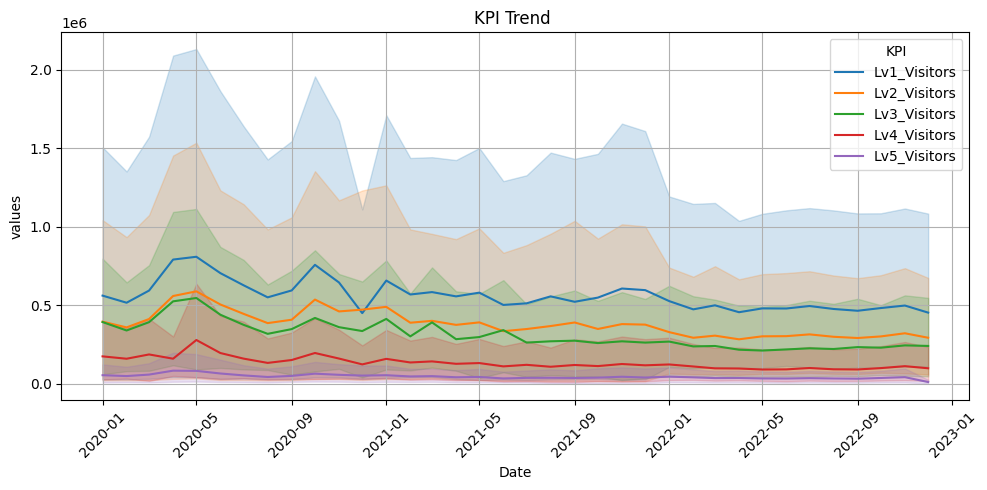

In [211]:
#plotting KPI trend
plt.figure(figsize=(10, 5))
sns.lineplot(x = funnel_df1['Date'], y= funnel_df1['Value'],hue=funnel_df['KPI'])
plt.title('KPI Trend ')
plt.xlabel('Date')
plt.ylabel('values')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

In [212]:
# Function to Plot Line and Bar Graphs Based on User Inputs

def kpi_graph(region, cus_seg, kpi, start_date, end_date):
    # Format start_date and end_date to ensure consistency and match the 'Date' column in the DataFrame
    start_date = f'{start_date}-01'
    end_date = f'{end_date}-01'

    # Create a DataFrame 'graph_df' based on user-defined criteria and filters
    graph_df = funnel_df1[
        (funnel_df1['Date'] >= start_date) & (funnel_df1['Date'] <= end_date) &
        (funnel_df1['Region'] == region) & (funnel_df1['Customer Segment'] == cus_seg) &
        (funnel_df1['KPI'] == kpi)
    ]

    # Create and display a line plot to visualize the trend of the selected 'KPI' for the specified 'region' and 'cus_seg'
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=graph_df['Date'], y=graph_df['Value'], hue=graph_df['KPI'])
    plt.title(f'{kpi} Trend for {region} - {cus_seg}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

    # Create and display a bar plot to visualize the trend of the selected 'KPI' for the specified 'region' and 'cus_seg'
    plt.figure(figsize=(10, 5))
    sns.barplot(x=graph_df['Date'], y=graph_df['Value'], hue=graph_df['KPI'])
    plt.title(f'KPI Trend for {region} - {cus_seg}')
    plt.xlabel('Date')
    plt.ylabel('No_of_Visits')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()

    # Show the plots
    plt.show()




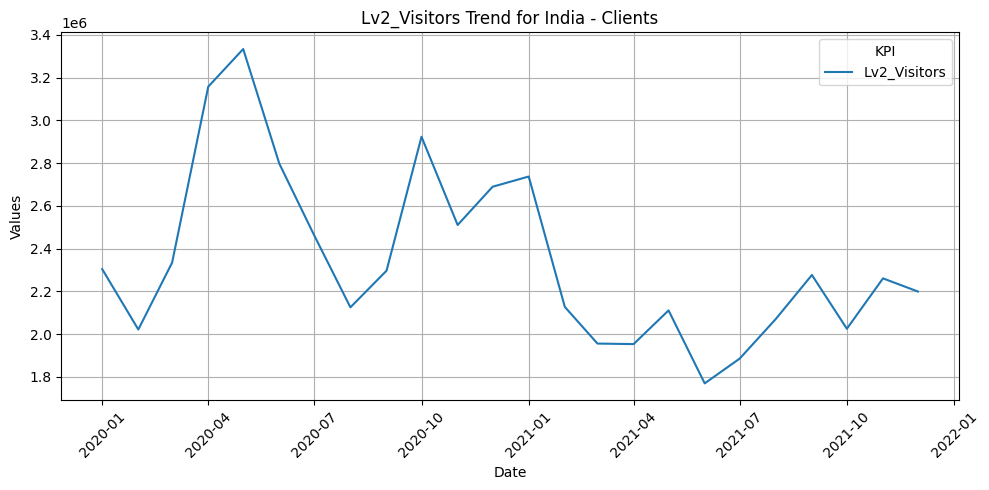

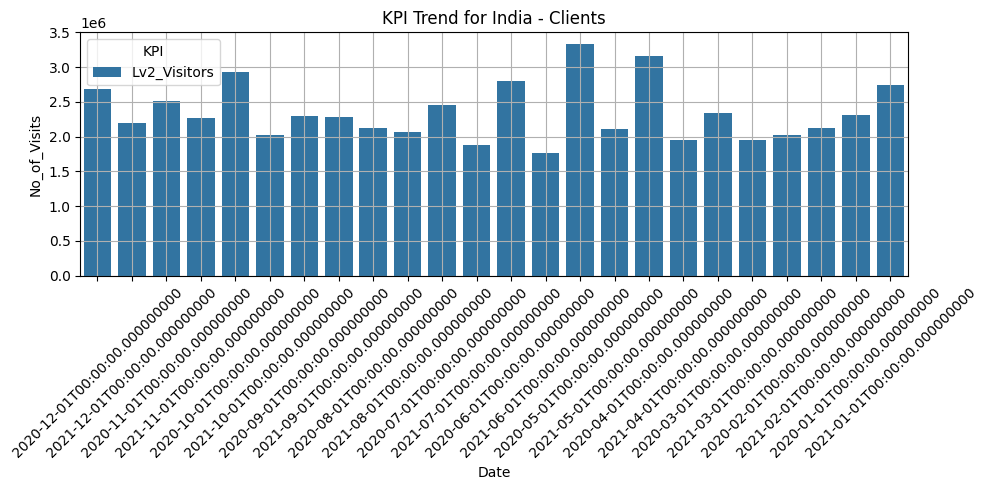

In [213]:
kpi_graph('India', 'Clients', 'Lv2_Visitors', '2020-01', '2021-12')

b.	Based on the input parameters, forecasts the Value column using the following algorithm and spit out the actual values and the forecasted values appended in a single csv file for each algorithm:
i.	SARIMA
ii.	Long Short-Term Memory (LSTM) Networks
iii.	Moving average


# **Sorting dataset using input parameters**


In [214]:
# function to create new Dataframe based on input parameters
def new_df(region, cus_seg,kpi, start_date, end_date):
  start_date = f'{start_date}-01'
  end_date = f'{end_date}-01'

  df = funnel_df1[(funnel_df1['Date']>= start_date) & (funnel_df1['Date']<= end_date) & (funnel_df1['Region'] == region) & (funnel_df1['Customer Segment'] == cus_seg)&(funnel_df1['KPI'] == kpi)]
  return df

In [215]:
df= new_df('India', 'Clients','Lv2_Visitors' ,'2020-01', '2021-12')
df.head()

,Year,Month,Customer Segment,Region,KPI,Value Type,Value,Date
1,2020,12,Clients,India,Lv2_Visitors,Actuals,2689569.0,2020-12-01
9,2021,12,Clients,India,Lv2_Visitors,Actuals,2199420.0,2021-12-01
42,2020,11,Clients,India,Lv2_Visitors,Actuals,2510682.0,2020-11-01
50,2021,11,Clients,India,Lv2_Visitors,Actuals,2261094.0,2021-11-01
83,2020,10,Clients,India,Lv2_Visitors,Actuals,2923280.0,2020-10-01


In [216]:
forcasted_df= df[['Value', 'Date']]
forcasted_df.head()

,Value,Date
1,2689569.0,2020-12-01
9,2199420.0,2021-12-01
42,2510682.0,2020-11-01
50,2261094.0,2021-11-01
83,2923280.0,2020-10-01


In [217]:
forcasted_df.set_index('Date', inplace=True) #Using Date as index for time series analysis
forcasted_df.head()

,Value
Date,
2020-12-01,2689569.0
2021-12-01,2199420.0
2020-11-01,2510682.0
2021-11-01,2261094.0
2020-10-01,2923280.0


Text(0.5, 1.0, 'Overall value trend')

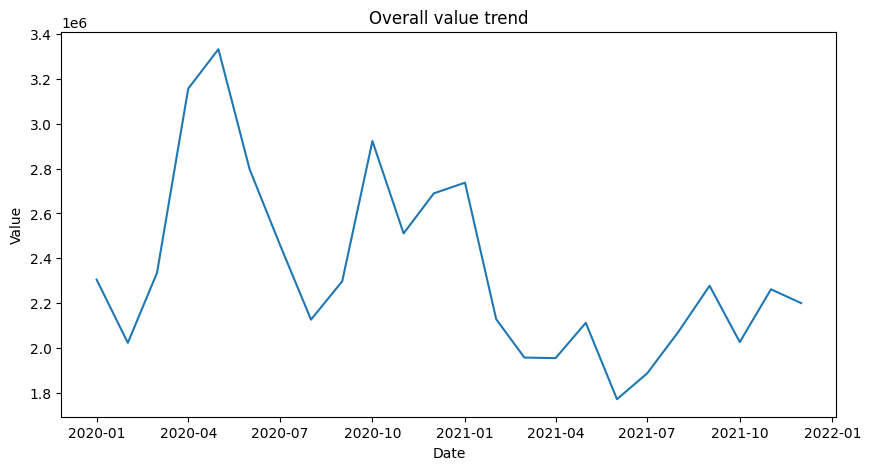

In [218]:
plt.figure(figsize=(10,5))
sns.lineplot(x =forcasted_df.index, y= forcasted_df['Value'], data=forcasted_df)
plt.title('Overall value trend')

In [219]:
from statsmodels.tsa.stattools import adfuller #dickky fuller test to check stationary of data
from sklearn.metrics import mean_squared_error


In [220]:
def adfuller_test(df):
  test_result = adfuller(df)
  print(test_result)

  print('-----------------------------------------------------------------')
  labels= ['ADf test statistics', 'p-value', '#lags used', 'No_of_observations']

  for value, label in zip(test_result, labels):
    print(label, ' : ', value)

  print('**********************')
  if test_result[1] <= 0.05:
    print('Values are stationary')
  else:
    print('values are not stationary')


In [221]:
adfuller_test(forcasted_df['Value'])

(-3.051561831945874, 0.03035175687031555, 3, 20, {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125}, 391.28267522383464)
-----------------------------------------------------------------
ADf test statistics  :  -3.051561831945874
p-value  :  0.03035175687031555
#lags used  :  3
No_of_observations  :  20
**********************
Values are stationary


In [222]:
forcasted_df['seasonal_shift']=forcasted_df['Value']-forcasted_df['Value'].shift(1)
forcasted_df

<ipython-input-222-d8cd1058c54d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forcasted_df['seasonal_shift']=forcasted_df['Value']-forcasted_df['Value'].shift(1)


,Value,seasonal_shift
Date,,
2020-12-01,2.689569e+06,NaN
2021-12-01,2.199420e+06,-4.901490e+05
2020-11-01,2.510682e+06,3.112620e+05
2021-11-01,2.261094e+06,-2.495880e+05
2020-10-01,2.923280e+06,6.621860e+05
2021-10-01,2.025461e+06,-8.978190e+05
2020-09-01,2.296989e+06,2.715280e+05
2021-09-01,2.276903e+06,-2.008583e+04
2020-08-01,2.125630e+06,-1.512732e+05


In [223]:
adfuller_test(forcasted_df['seasonal_shift'].dropna())

(-2.8829400215579315, 0.04736811133676727, 6, 16, {'1%': -3.9240193847656246, '5%': -3.0684982031250003, '10%': -2.67389265625}, 370.32020652953247)
-----------------------------------------------------------------
ADf test statistics  :  -2.8829400215579315
p-value  :  0.04736811133676727
#lags used  :  6
No_of_observations  :  16
**********************
Values are stationary


<Axes: xlabel='Date', ylabel='seasonal_shift'>

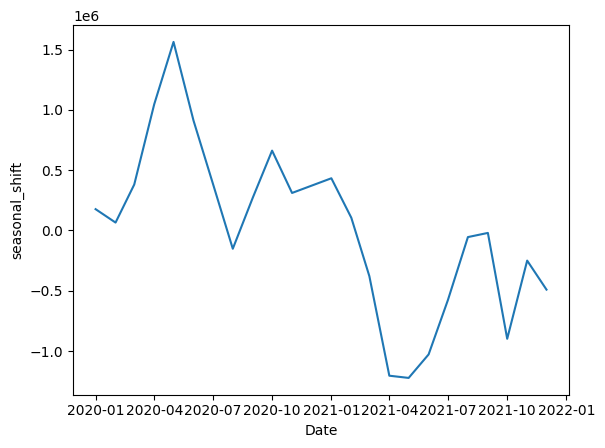

In [224]:
sns.lineplot(forcasted_df['seasonal_shift'])

<ipython-input-225-7896957d6c75>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forcasted_df['rollmean'] = forcasted_df['seasonal_shift'].rolling(window=2).mean()
<ipython-input-225-7896957d6c75>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forcasted_df['rollstd'] = forcasted_df['seasonal_shift'].rolling(window=2).std()


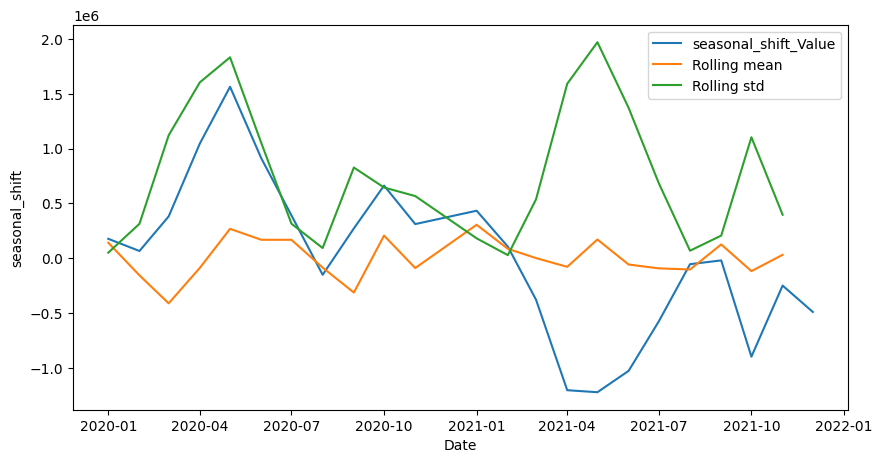

In [225]:
# Calculate Rolling Mean and Rolling Standard Deviation

# Calculate the rolling mean for the 'seasonal_shift' column using a window size of 2.
forcasted_df['rollmean'] = forcasted_df['seasonal_shift'].rolling(window=2).mean()

# Calculate the rolling standard deviation for the 'seasonal_shift' column using a window size of 2.
forcasted_df['rollstd'] = forcasted_df['seasonal_shift'].rolling(window=2).std()

# Create a line plot to visualize the 'seasonal_shift', rolling mean, and rolling standard deviation.
plt.figure(figsize=(10, 5))

# Plot the 'seasonal_shift' values and label it as 'seasonal_shift_Value'.
sns.lineplot(forcasted_df['seasonal_shift'], label='seasonal_shift_Value')

# Plot the rolling mean values and label it as 'Rolling mean'.
sns.lineplot(forcasted_df['rollmean'], label='Rolling mean')

# Plot the rolling standard deviation values and label it as 'Rolling std'.
sns.lineplot(forcasted_df['rollstd'], label='Rolling std')

# Add a legend to differentiate the lines in the plot.
plt.legend()

# You can further customize the plot as needed, such as adding titles, labels, and adjusting visual elements.


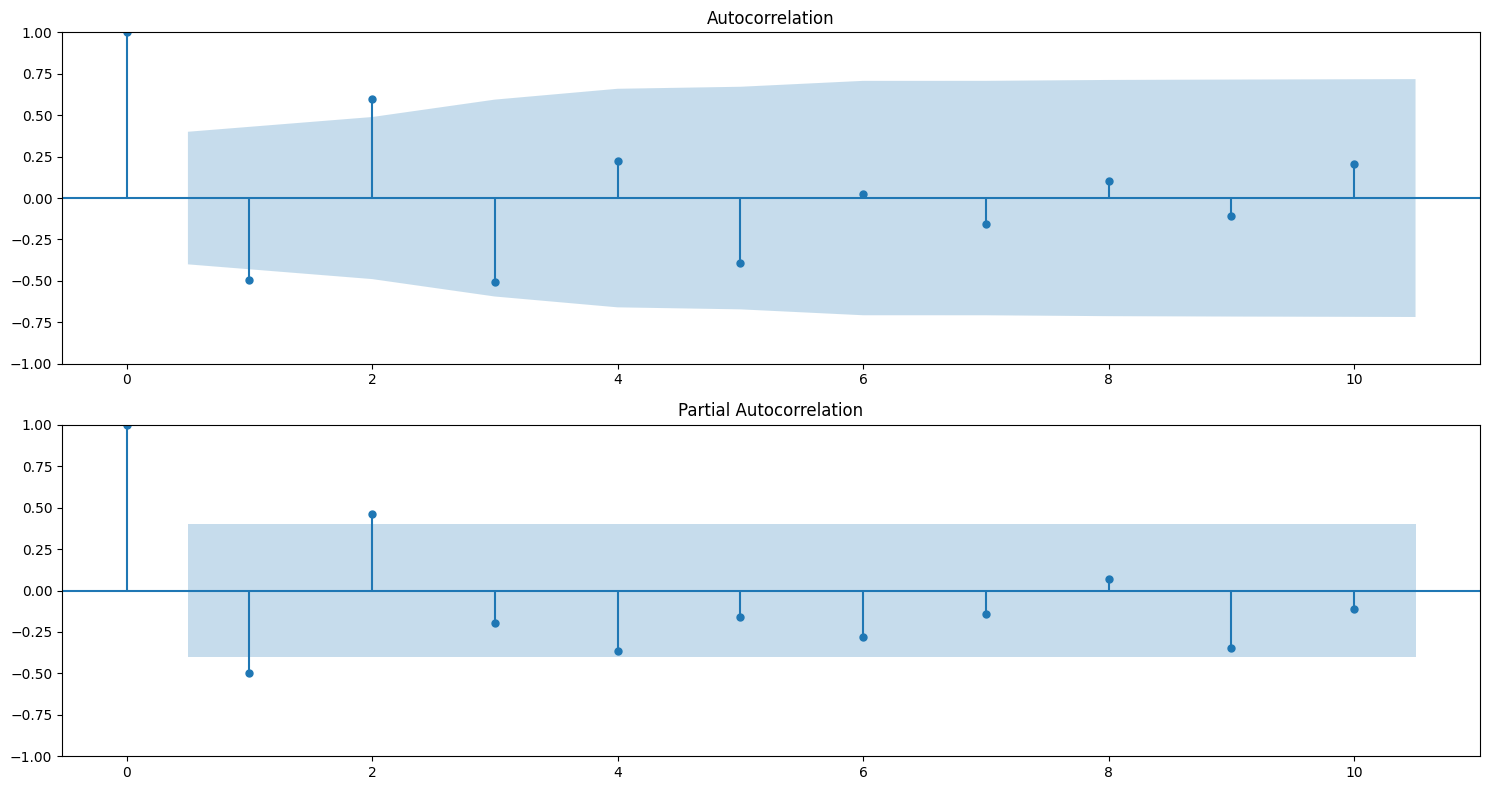

In [226]:
import statsmodels.api as sm

# Create Autocorrelation and Partial Autocorrelation Plots

# Import the 'statsmodels' library with the alias 'sm' to perform time series analysis.

# Create a figure with two subplots: one for the autocorrelation plot and one for the partial autocorrelation plot.
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(211)

# Generate the autocorrelation plot (ACF) for the 'Value' column, specifying the number of lags as 10.
fig = sm.graphics.tsa.plot_acf(forcasted_df['Value'].dropna(), lags=10, ax=ax1)

ax2 = fig.add_subplot(212)

# Generate the partial autocorrelation plot (PACF) for the 'Value' column, specifying the number of lags as 10.
fig = sm.graphics.tsa.plot_pacf(forcasted_df['Value'].dropna(), lags=10, ax=ax2)

# Adjust the layout to ensure that the plots do not overlap.
plt.tight_layout()

# The resulting plots show the autocorrelation and partial autocorrelation of the 'Value' time series data.


**Observation**
-  p = 1
-  d = 1
-  q = 1

In [227]:
# Function for Time Series Forecasting and Evaluation

def forecasting_mv(region, cus_seg, kpi, start_date, end_date):
    # Generate a DataFrame 'df' based on user-defined criteria and filters using the 'new_df' function.
    df = new_df(region, cus_seg, kpi, start_date, end_date)

    # Create a DataFrame 'forcasted_df' that includes the 'Value' and 'Date' columns, and set 'Date' as the index.
    forcasted_df = df[['Value', 'Date']]
    forcasted_df.set_index('Date', inplace=True)

    # Calculate the rolling mean and rolling standard deviation for the 'Value' column with a window size of 2.
    forcasted_df['rollmean'] = forcasted_df['Value'].rolling(window=2).mean()
    forcasted_df['rollstd'] = forcasted_df['Value'].rolling(window=2).std()

    # Create a line plot to visualize the 'Value', rolling mean, and rolling standard deviation.
    plt.figure(figsize=(10, 5))
    sns.lineplot(forcasted_df['Value'], label='Value')
    sns.lineplot(forcasted_df['rollmean'], label='Rolling mean')
    sns.lineplot(forcasted_df['rollstd'], label='Rolling std')
    plt.legend()

    print('************************************************')

    # Remove rows with missing values (NaN) from 'forcasted_df'.
    forcasted_df = forcasted_df.dropna()

    # Calculate the mean squared error (MSE) between 'Value' and 'rollmean'.
    mse = mean_squared_error(forcasted_df['Value'], forcasted_df['rollmean'])
    print("Mean Square Error (MSE):", mse)

    print('************************************************')

    # Calculate the Mean Absolute Percentage Error (MAPE) between 'Value' and 'rollmean'.
    mape = (np.abs((forcasted_df['Value'] - forcasted_df['rollmean']) / forcasted_df['Value'])).mean() * 100
    print("Mean Absolute Percentage Error (MAPE):", mape)


<ipython-input-227-e997966edb44>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forcasted_df['rollmean'] = forcasted_df['Value'].rolling(window=2).mean()
<ipython-input-227-e997966edb44>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forcasted_df['rollstd'] = forcasted_df['Value'].rolling(window=2).std()


************************************************
Mean Square Error (MSE): 183226585662.5435
************************************************
Mean Absolute Percentage Error (MAPE): 9.25120376336473


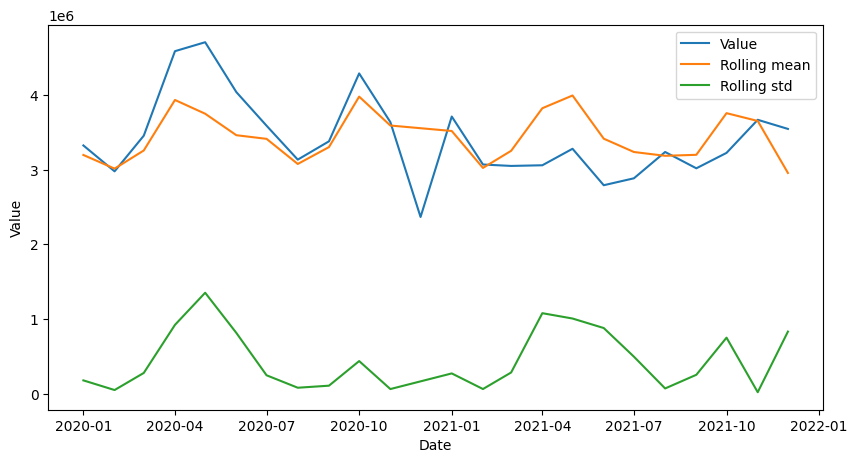

In [228]:
forecasting_mv('India', 'Clients','Lv1_Visitors' ,'2020-01', '2021-12')

# SARIMA

In [229]:
# Function to develop a complete time series based user inputs
# Function for SARIMA Time Series Forecasting and Evaluation

def forecasting_sarima(region, cus_seg, kpi, start_date, end_date):
    # Generate a DataFrame 'df' based on user-defined criteria and filters using the 'new_df' function.
    df = new_df(region, cus_seg, kpi, start_date, end_date)

    # Create a 'forcasted_df' DataFrame with the 'Value' and 'Date' columns, and set 'Date' as the index.
    forcasted_df = df[['Value', 'Date']]
    forcasted_df.set_index('Date', inplace=True)

    # Perform Augmented Dickey-Fuller test for stationarity (the 'adfuller_test' function is assumed).
    adfuller_test(forcasted_df['Value'])

    # Create a copy 'se_df' of 'forcasted_df' and adjust the index frequency to monthly.
    se_df = forcasted_df.copy()
    se_df.index = pd.date_range(start=se_df.index[0], periods=len(se_df), freq='M')

    # Build a SARIMA model with specified orders.
    model = sm.tsa.statespace.SARIMAX(se_df['Value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    result = model.fit()

    # Define the range for forecasting using a proportion of the data.
    i = round(len(se_df) * 0.65)
    start = se_df.index[i]
    end = se_df.index[-1]

    # Generate forecasts for the specified range.
    se_df['forecast'] = result.predict(start=start, end=end, dynamic=True)

    # Create a line plot to visualize 'Value' and the forecast.
    plt.figure(figsize=(10, 5))
    se_df[['Value', 'forecast']].plot()
    plt.show()

    print('************************************************')

    # Remove rows with missing values in 'Value' and 'forecast'.
    error_df = se_df.dropna()

    # Calculate the Mean Square Error (MSE) for forecast evaluation.
    mse = mean_squared_error(error_df['Value'].dropna(), error_df['forecast'].dropna())
    print("Mean Square Error (MSE):", mse)

    print('************************************************')

    # Calculate the Mean Absolute Percentage Error (MAPE) for forecast accuracy assessment.
    mape = (np.abs((error_df['Value'] - error_df['forecast']) / error_df['Value'])).mean() * 100
    print("Mean Absolute Percentage Error (MAPE):", mape)


(-3.217109544188779, 0.019015428150329684, 7, 16, {'1%': -3.9240193847656246, '5%': -3.0684982031250003, '10%': -2.67389265625}, 402.2697044176177)
-----------------------------------------------------------------
ADf test statistics  :  -3.217109544188779
p-value  :  0.019015428150329684
#lags used  :  7
No_of_observations  :  16
**********************
Values are stationary


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<Figure size 1000x500 with 0 Axes>

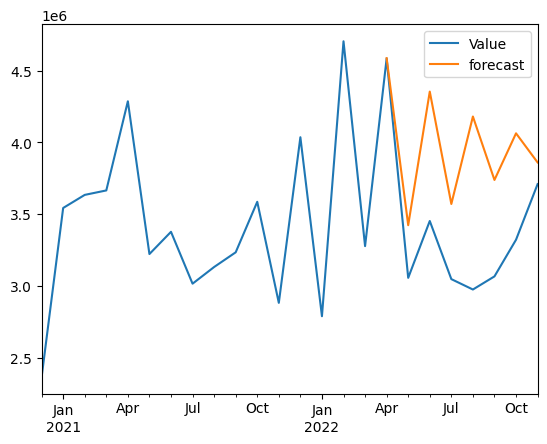

************************************************
Mean Square Error (MSE): 460952240555.53796
************************************************
Mean Absolute Percentage Error (MAPE): 17.987179626179984


In [230]:
# function recieves input parametrs and show final time series analysis of sorted data
forecasting_sarima('India', 'Clients','Lv1_Visitors' ,'2020-01', '2021-12')

# **LSTM model**




In [231]:
# Function for Filtering and Sorting Data

def sorted_df(region, cus_seg, kpi, start_date, end_date):
    # Format the start_date and end_date to ensure consistency and match the 'Date' column in the DataFrame.
    start_date = f'{start_date}-01'
    end_date = f'{end_date}-01'

    # Filter the original DataFrame 'funnel_df1' based on user-defined criteria.
    df = funnel_df1[
        (funnel_df1['Date'] >= start_date) & (funnel_df1['Date'] <= end_date) &
        (funnel_df1['Region'] == region) & (funnel_df1['Customer Segment'] == cus_seg) &
        (funnel_df1['KPI'] == kpi)
    ]

    # Select and set the 'Value' and 'Date' columns as the new DataFrame and set 'Date' as the index.
    df = df[['Value', 'Date']]
    df.set_index('Date', inplace=True)

    return df


In [232]:
from sklearn.preprocessing import MinMaxScaler
ms= MinMaxScaler()

In [233]:
# Function for Preparing Time Series Data

def x_ycol(df, window_size):
    # Convert the DataFrame to a NumPy array.
    df_np = df.to_numpy()

    # Apply Min-Max scaling to the data using 'ms' (assumed to be a valid scaler).
    df_np = ms.fit_transform(df_np)

    x = []  # List to store input sequences.
    y = []  # List to store corresponding output values.

    # Iterate through the data, creating input sequences and their corresponding output values.
    for i in range(len(df_np) - window_size):
        # Create an input sequence with 'window_size' time steps.
        row = [[a] for a in df_np[i: i + window_size]]
        x.append(row)

        # Obtain the corresponding output value (label).
        label = df_np[i + window_size]
        y.append(label)

    # Convert the lists to NumPy arrays and return them.
    return np.array(x), np.array(y)


In [234]:
# Step 1: Create a DataFrame 'lstm_df' with sorted and filtered data
lstm_df = sorted_df('India', 'Clients', 'Lv1_Visitors', '2020-01', '2021-12')

# Step 2: Prepare input features 'X' and target values 'Y' using the 'x_ycol' function
X, Y = x_ycol(lstm_df, 3)

# Reshape the input data to the expected LSTM input shape (samples, time steps, features)
X = X.reshape(21, 3, 1)

# Reshape the target values to match the input data
Y = Y.reshape(21)

# Step 3: Split the data into training and testing sets
# Training set
x_train, y_train = X[:15], Y[:15]

# Testing set
x_test, y_test = X[15:], Y[15:]

In [235]:
# Import necessary components from TensorFlow for building an LSTM model

# Import the Sequential model to create a linear stack of layers.
from tensorflow.keras.models import Sequential

# Import InputLayer to define the input layer,LSTM (Long Short-Term Memory) , Dense layer of the model.
from tensorflow.keras.layers import InputLayer, LSTM, Dense


# Import the mean squared error loss function for regression problems.
from tensorflow.keras.losses import mean_squared_error

# Import the mean absolute percentage error metric for evaluating regression model performance.
from tensorflow.keras.metrics import mean_absolute_percentage_error



In [236]:
# Model Development

# Create a Sequential model for a neural network.
model = Sequential()

# Add an input layer with input shape (3, 1), indicating that the model expects input sequences of length 3 and one feature dimension.
model.add(InputLayer((3, 1)))

# Add an LSTM layer with 64 units, which is a type of recurrent layer suitable for processing sequential data.
model.add(LSTM(64))

# Add a dense layer with 8 units and 'relu' activation function.
model.add(Dense(8, activation='relu'))

# Add a dense output layer with 1 unit and 'linear' activation function for regression tasks.
model.add(Dense(1, activation='linear'))



In [237]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [238]:
# Model Compilation

# Compile the model using the 'adam' optimizer, 'mean_squared_error' loss function, and 'mean_absolute_percentage_error' metric.

# The 'adam' optimizer is a popular choice for gradient-based optimization.
# It adapts the learning rate during training for better convergence.

# The 'mean_squared_error' loss function is commonly used for regression tasks.
# It measures the mean squared difference between predicted and actual values.

# The 'mean_absolute_percentage_error' metric is used to evaluate the model's performance in terms of percentage error in predictions.

model.compile(
    optimizer='adam',  # Optimizer choice: 'adam'
    loss='mean_squared_error',  # Loss function: Mean Squared Error (MSE)
    metrics=['mean_absolute_percentage_error']  # Evaluation metric: Mean Absolute Percentage Error (MAPE)
)


In [239]:
model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 0.3005 - mean_absolute_percentage_error: 97.6350
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2869 - mean_absolute_percentage_error: 93.7942
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2747 - mean_absolute_percentage_error: 90.2973
Epoch 4/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2629 - mean_absolute_percentage_error: 86.8088
Epoch 5/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2534 - mean_absolute_percentage_error: 83.8594
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.2448 - mean_absolute_percentage_error: 81.1720
Epoch 7/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2361 - mean_absolute_percentage_error: 78.3930
Epoch 8/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.2273 - mean_absolute_percentage_error: 75.5414
Epoch 9/1000
1/1 [========

In [240]:

def model_plot(x, y):
  prediction = model.predict(x).flatten()
  result_df = pd.DataFrame()
  result_df['Train Prediction']= prediction
  result_df['Actual']= y
  result_df.plot()
  mape = mean_absolute_percentage_error(y, prediction)
  print("Mean Absolute Percentage Error (MAPE):", np.mean(mape))


1/1 [==============================] - 0s 433ms/step
Mean Absolute Percentage Error (MAPE): 19.21096


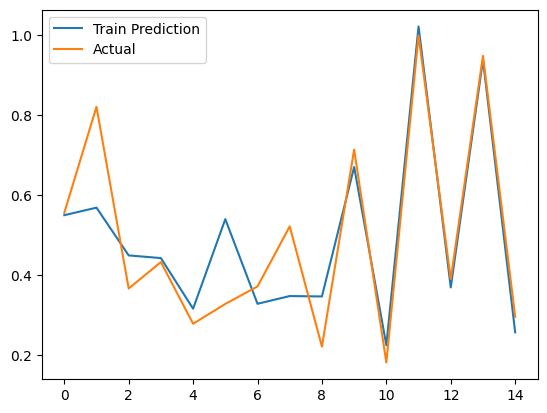

In [241]:
model_plot(x_train, y_train)

1/1 [==============================] - 0s 59ms/step
Mean Absolute Percentage Error (MAPE): 50.11657


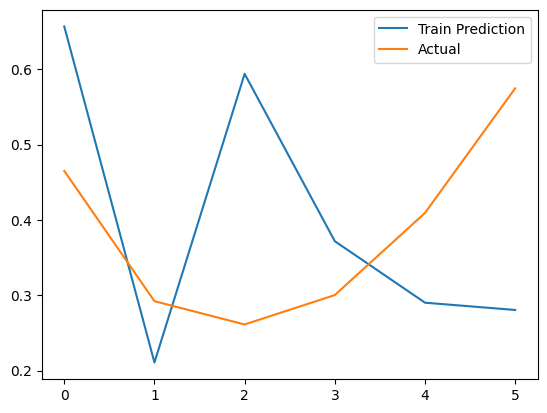

In [242]:
model_plot(x_test, y_test)

# **Exploratory Data Analysis**

3.	You are the star data scientist of the company & are part of the strategy team which is tasked with growing the business. The team is relying upon you to find data backed strategies from the give data. Please create a power point presentation where you would present the data to answer the following questions.
-  a.	If we always spend 1 lakh INR/month on all the regions and segments, can you perform an EDA and find out for which Region, Customer segment, Year & month the CAC (Cost of acquiring Customer) was highest. (CAC = (number of visitors paid * price of the service)/marketing spend). We would like to see visually how you arrived at the answer so some graph should be in order.
-  b.	If we have always allocated 1 lakh INR/month to Uddeppy, Dehradun, Ujjain & Indore region for marketing can you tell us, based on your best forecasting model values, which region should we allocate less money for the upcoming quarters? (The goal of the business is to increase the LV5/LV1 ratio and optimize the Cost of acquiring Customer)


In [243]:
funnel_df1.head(10)

,Year,Month,Customer Segment,Region,KPI,Value Type,Value,Date
0,2020,12,Clients,India,Lv1_Visitors,Actuals,2.365913e+06,2020-12-01
1,2020,12,Clients,India,Lv2_Visitors,Actuals,2.689569e+06,2020-12-01
2,2020,12,Clients,India,Lv3_Visitors,Actuals,1.300571e+06,2020-12-01
3,2020,12,Clients,India,Lv4_Visitors,Actuals,5.134339e+05,2020-12-01
4,2020,12,Clients,India,Lv3_Visitors,Actuals,7.066770e+05,2020-12-01
5,2020,12,Clients,India,Lv5_Visitors,Actuals,2.557230e+05,2020-12-01
6,2020,12,Clients,India,Lv4_Visitors,Actuals,1.801250e+05,2020-12-01
7,2020,12,Clients,India,Lv5_Visitors,Actuals,7.476800e+04,2020-12-01
8,2021,12,Clients,India,Lv1_Visitors,Actuals,3.543797e+06,2021-12-01
9,2021,12,Clients,India,Lv2_Visitors,Actuals,2.199420e+06,2021-12-01


In [244]:
# Function for Data Visualization

def plot_value(x):
    # Group the data by 'Customer Segment' and the specified 'x' variable, and calculate the sum of 'Value'
    agg_result_seg = funnel_df1.groupby(['Customer Segment', x])['Value'].sum().reset_index()

    # Create a bar plot to visualize the aggregated results
    plt.figure(figsize=(10, 5))

    # Create a bar plot using Seaborn's barplot function
    ax = sns.barplot(x='Customer Segment', y='Value', hue=x, data=agg_result_seg)

    # Set the title of the plot
    plt.title(f'Sum of Value by Customer Segment and {x}')

    # Label the x and y axes
    plt.xlabel('Customer Segment')
    plt.ylabel('Sum of Value')

    # Show the plot
    plt.show()


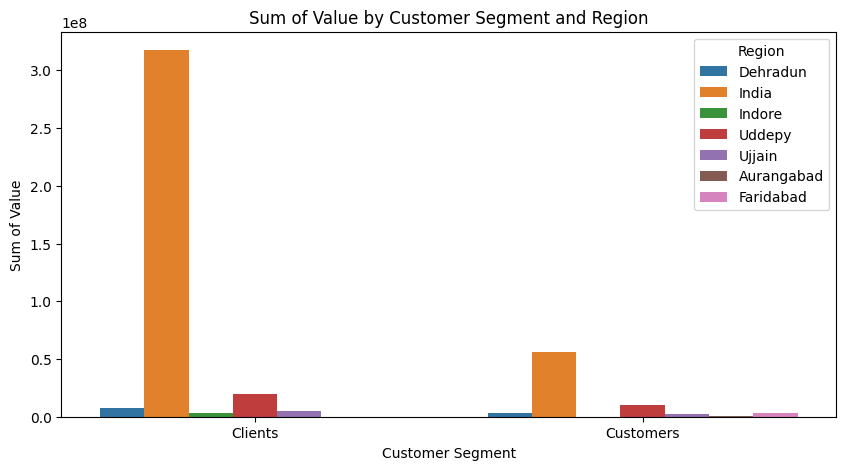

In [245]:
plot_value('Region')

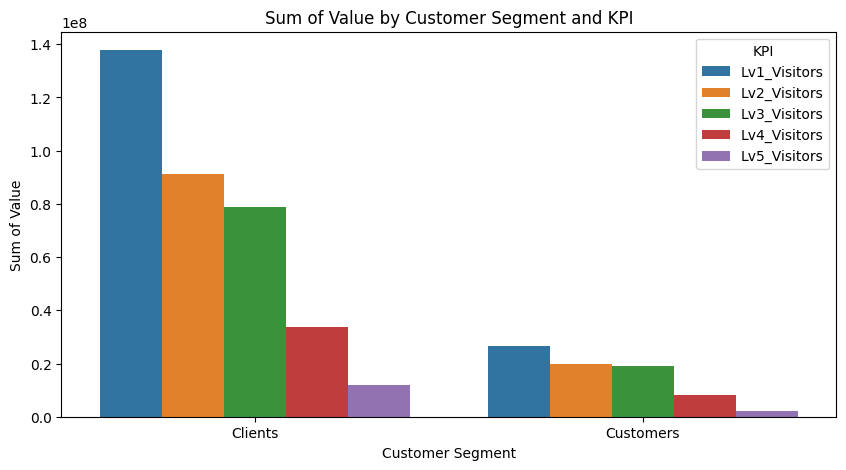

In [246]:
plot_value('KPI')

In [247]:
# Function for Data Visualization

def plot_seg_cac(x):
    # Filter the DataFrame to select rows where 'Customer Segment' matches the specified 'x'
    filtered_df = funnel_df1[funnel_df1['Customer Segment'] == x]

    # Group the filtered data by 'Year', 'Month', and 'Region', then calculate the sum of 'Value' and scale it
    result = (filtered_df.groupby(['Year', 'Month', 'Region'])['Value'].sum() * 100 / 100000).reset_index(name='CAC')

    # Create a line plot to visualize the CAC (Customer Acquisition Cost) over time by Region
    plt.figure(figsize=(10, 5))

    # Use Seaborn's lineplot to create the line plot
    sns.lineplot(x=result['Year'], y=result['CAC'], hue=result['Region'])

    # Set the title of the plot
    plt.title(f'Line Plot of {x} - CAC Over Years by Region')

    # Label the x and y axes
    plt.xlabel('Year')
    plt.ylabel('CAC Value')

    # Add a legend to differentiate regions
    plt.legend(title='Region', loc='upper right')


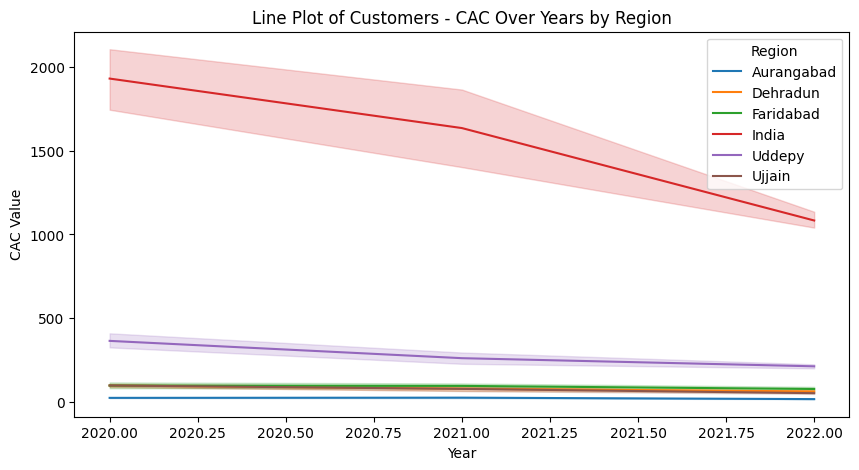

In [248]:
plot_seg_cac('Customers')

Among all regions India is top followed by Uddepy in making more profit and less customer acquiring cost.

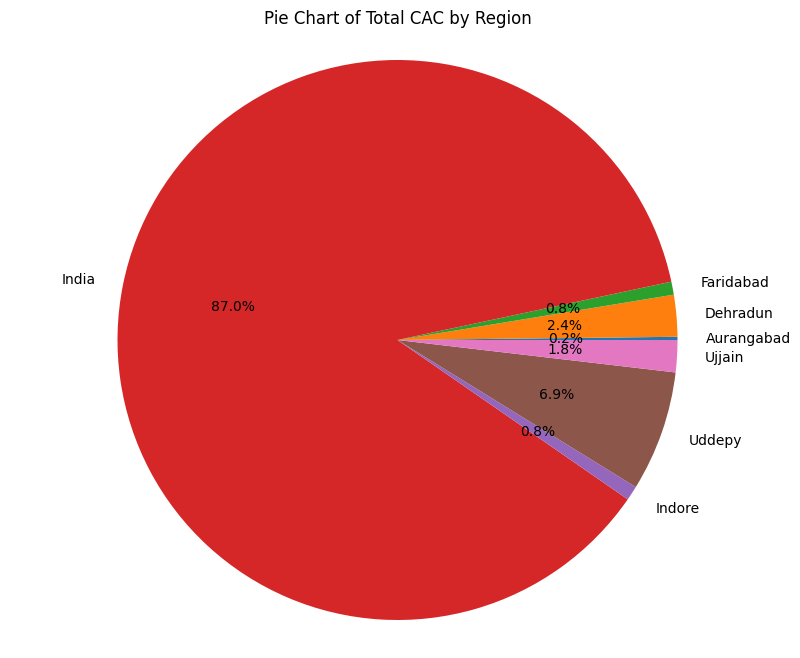

In [249]:
# Group the filtered data by 'Year', 'Month', and 'Region', then calculate the sum of 'Value' and scale it
result = (funnel_df1.groupby(['Region'])['Value'].sum() * 100 / 100000).reset_index(name='CAC')
# Aggregate the result DataFrame to calculate the total CAC by region
agg_result = result.groupby('Region')['CAC'].sum()

plt.figure(figsize=(10,8))
# Create a pie chart to visualize the distribution of total CAC by region
plt.pie(agg_result, labels=agg_result.index, autopct='%1.1f%%')

# Set the aspect ratio to ensure the pie chart is drawn as a circle
plt.axis('equal')

# Set the title for the pie chart
plt.title('Pie Chart of Total CAC by Region')

# Display the pie chart
plt.show()


In [250]:
# Conversion Rate

# Calculate the conversion rate by summing the 'Value' for KPI 'Lv5_Visitors' and dividing it by the sum for KPI 'Lv1_Visitors.'
conversion = (funnel_df1[funnel_df1['KPI'] == 'Lv5_Visitors']['Value'].sum() / funnel_df1[funnel_df1['KPI'] == 'Lv1_Visitors']['Value'].sum()) * 100

# Print the calculated conversion rate, rounded to two decimal places.
print(f'Total percentage of visitors turning to paid customers: {conversion.round(2)}%')


Total percentage of visitors turning to paid customers: 8.63%


In [251]:
# Function for Plotting Conversion Rate vs 'x'

def plot_kpi_ratio(x):
    # Aggregate data for KPI 'Lv5_Visitors' and 'Lv1_Visitors' separately based on the specified variable 'x.'
    agg_resultlv5 = funnel_df1[funnel_df1['KPI'] == 'Lv5_Visitors'].groupby(x)['Value'].sum().reset_index(name='Lv5')
    agg_resultlv1 = funnel_df1[funnel_df1['KPI'] == 'Lv1_Visitors'].groupby(x)['Value'].sum().reset_index(name='Lv1')

    # Merge the two DataFrames based on the specified key ('Region' or 'x') to combine the data.
    agg_result = pd.merge(agg_resultlv1, agg_resultlv5, on=x, how='right')

    # Calculate the conversion rate and add it as a new column 'Conversion %' (rounded to two decimal places).
    agg_result['Conversion %'] = (agg_result['Lv5'] / agg_result['Lv1'] * 100).round(2)

    # Print the aggregated data.
    print(agg_result)

    # Create a bar plot to visualize the conversion rate vs the specified variable 'x.'
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x=x, y='Conversion %', data=agg_result)
    plt.title(f'Percentage of Visitors Turning to Paid Customers vs {x}')
    plt.xlabel(f'{x}')
    plt.ylabel('Percentage')

    # Display the plot.
    plt.show()


       Region          Lv1         Lv5  Conversion %
0  Aurangabad     276969.0     30501.0         11.01
1    Dehradun    4292320.0    403585.0          9.40
2   Faridabad    1070007.0    116170.0         10.86
3       India  142132823.0  12127418.0          8.53
4      Indore    1482479.0    165145.0         11.14
5      Uddepy   11900752.0   1029255.0          8.65
6      Ujjain    3137870.0    305652.0          9.74


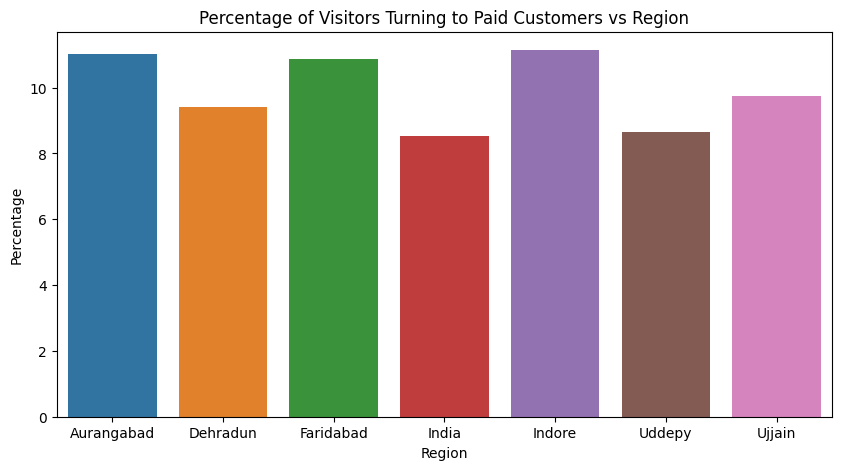

In [252]:
plot_kpi_ratio('Region')

**Based on the table that displays the conversion rates for various regions, specifically comparing 'Lv1' and 'Lv5' visitors and calculating the 'Conversion %,' we can draw the following conclusions:**

Variation in Conversion Rates: The table shows that different regions have varying conversion rates. For example, 'Indore' has the highest conversion rate at 11.14%, while 'Dehradun' and 'Faridabad' also have relatively high conversion rates at 9.40% and 10.86%, respectively. On the other hand, 'Uddepy' and 'India' have relatively lower conversion rates at 8.65% and 8.53%, respectively. This indicates that there is significant regional variation in the ability to convert visitors into paid customers.

Regional Impact: The regional impact on conversion rates is evident. Factors such as local demographics, economic conditions, marketing strategies, and customer behavior may contribute to these regional variations. It's important for businesses to understand these regional differences and tailor their strategies accordingly.

Aurangabad and Ujjain: 'Aurangabad' and 'Ujjain' also exhibit relatively high conversion rates at 11.01% and 9.74%, respectively. These regions may present opportunities for businesses to target and further optimize their marketing efforts.

National Overview: 'India' represents the national average, with a conversion rate of 8.53%. It's essential to consider this overall conversion rate when planning marketing and sales strategies on a broader scale.






